## 1. Import all needed Libraries/Module

In [42]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy

## 2. Read data, and then do some explanatory data analysis

In [47]:
data=pd.read_csv('train_selected_scaled_round.csv',header=0,index_col=0)
data

,DC024,DC025,DC205,DC220,DC226,DC230a,DC237,DC237a,DC237b,DC237f,DC241,DC244,DC246,DC109,DC201
0,-1.322809,0.804467,-0.105158,2.434765,0.319398,-0.456516,0.512539,0.553102,-0.061283,-0.464013,-0.356393,-0.814230,-0.816532,-0.553274,0
1,-1.322809,0.804467,1.959367,-0.342153,-0.373110,-0.456516,0.512539,0.553102,-0.061283,-0.464013,-0.356393,1.228154,1.224692,1.109705,0
2,-1.322809,0.804467,-0.655698,-1.036383,-0.373110,-0.456516,0.512539,0.553102,-0.061283,-0.464013,-0.356393,1.228154,1.224692,-0.640799,0
3,-1.322809,0.804467,-0.655698,2.357628,0.319398,-0.456516,0.512539,0.553102,-0.061283,-0.464013,2.132331,1.228154,-0.816532,-0.640799,0
4,-1.322809,0.804467,-0.655698,-0.882110,0.319398,1.064267,0.512539,0.553102,-0.061283,-0.464013,-0.356393,-0.814230,1.224692,-0.640799,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64791,1.324220,0.804467,1.546462,1.586262,0.319398,1.064267,0.512539,0.553102,-0.061283,1.993716,-0.356393,1.228154,1.224692,0.934655,1
64792,1.120602,0.804467,-0.105158,-0.187880,-0.026856,-0.456516,0.512539,0.553102,-0.061283,-0.464013,-0.356393,-0.814230,-0.816532,-0.203173,1
64793,0.835538,0.804467,-0.518063,-0.650700,-0.373110,1.064267,0.512539,0.553102,-0.061283,-0.464013,-0.356393,1.228154,1.224692,-0.378223,1
64794,-1.037744,0.804467,-0.105158,0.892033,0.319398,1.064267,0.512539,0.553102,-0.061283,-0.464013,-0.356393,-0.814230,-0.816532,0.146928,1


In [48]:
# gather information about data attribute
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 64796 entries, 0 to 64795
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DC024   64796 non-null  float64
 1   DC025   64796 non-null  float64
 2   DC205   64796 non-null  float64
 3   DC220   64796 non-null  float64
 4   DC226   64796 non-null  float64
 5   DC230a  64796 non-null  float64
 6   DC237   64796 non-null  float64
 7   DC237a  64796 non-null  float64
 8   DC237b  64796 non-null  float64
 9   DC237f  64796 non-null  float64
 10  DC241   64796 non-null  float64
 11  DC244   64796 non-null  float64
 12  DC246   64796 non-null  float64
 13  DC109   64796 non-null  float64
 14  DC201   64796 non-null  int64  
dtypes: float64(14), int64(1)
memory usage: 7.9 MB


Dari data di atas, dapat dilihat bahwa semua data bertipe data flloat/integer, dan label bertipe data string.

## Cari informasi apakah ada data yang bernilai null/kosong

In [49]:
data.isnull().sum()

DC024     0
DC025     0
DC205     0
DC220     0
DC226     0
DC230a    0
DC237     0
DC237a    0
DC237b    0
DC237f    0
DC241     0
DC244     0
DC246     0
DC109     0
DC201     0
dtype: int64

In [50]:
data['DC201'].value_counts()

DC201
0    32398
1    32398
Name: count, dtype: int64

In [51]:
#Split dataset menjadi training dan testing
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(data.drop('DC201',axis=1),data['DC201'],test_size=0.3)
input_shape=(x_train.shape)
input_shape

(45357, 14)

In [7]:
from keras import backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

### Create Model

### Deep Learning model

In [15]:
import tensorflow as tf
from tensorflow import keras
pretrained_model = keras.applications.DenseNet121(weights='imagenet', include_top=False, input_shape=(19, 1))
# Membekukan semua lapisan pada model yang dilatih
for layer in pretrained_model.layers:
    layer.trainable = False
model = keras.Sequential([
    pretrained_model,
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# Kompilasi model dengan optimizer, loss function, dan metrics
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

ValueError: `input_shape` must be a tuple of three integers.

In [9]:
model=tf.keras.models.Sequential([
    tf.keras.layers.Conv1D(filters=32,kernel_size=3,input_shape=(38,1),activation='relu'),
    tf.keras.layers.Conv1D(filters=32,kernel_size=3,activation='relu'),
    tf.keras.layers.Conv1D(filters=32,kernel_size=3,activation='relu'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.MaxPool1D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512,activation='relu'),
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy',f1_m])

# Print the model summary
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 36, 32)            128       
                                                                 
 conv1d_1 (Conv1D)           (None, 34, 32)            3104      
                                                                 
 conv1d_2 (Conv1D)           (None, 32, 32)            3104      
                                                                 
 dropout (Dropout)           (None, 32, 32)            0         
                                                                 
 max_pooling1d (MaxPooling1D  (None, 16, 32)           0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 512)               0         
                                                        

In [11]:
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout

# Define the input shape
input_shape = (11, 1)  # 38 attributes, 1 feature

# Define the model architecture
model=tf.keras.models.Sequential([
    tf.keras.layers.Conv1D(filters=64,kernel_size=3,input_shape=(19,1),activation='relu'),
    tf.keras.layers.Conv1D(filters=64,kernel_size=3,activation='relu'),
    tf.keras.layers.MaxPool1D(2,2),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv1D(filters=128,kernel_size=3,activation='relu'),
    tf.keras.layers.Conv1D(filters=128,kernel_size=3,activation='relu'),
    tf.keras.layers.MaxPool1D(2,2),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv1D(filters=256,kernel_size=3,activation='relu'),
    tf.keras.layers.Conv1D(filters=256,kernel_size=3,activation='relu'),
    tf.keras.layers.MaxPool1D(2,2),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512,activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1,activation='sigmoid')])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy',f1_m])

# Print the model summary
print(model.summary())


ValueError: One of the dimensions in the output is <= 0 due to downsampling in conv1d_7. Consider increasing the input size. Received input shape [None, 1, 128] which would produce output shape with a zero or negative value in a dimension.

In [10]:
history=model.fit(x_train,y_train,epochs=10,batch_size=32,validation_split=0.2)

Epoch 1/10


ValueError: in user code:

    File "c:\Users\ASUS\AppData\Local\Programs\Python\Python38\lib\site-packages\keras\engine\training.py", line 878, in train_function  *
        return step_function(self, iterator)
    File "c:\Users\ASUS\AppData\Local\Programs\Python\Python38\lib\site-packages\keras\engine\training.py", line 867, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\ASUS\AppData\Local\Programs\Python\Python38\lib\site-packages\keras\engine\training.py", line 860, in run_step  **
        outputs = model.train_step(data)
    File "c:\Users\ASUS\AppData\Local\Programs\Python\Python38\lib\site-packages\keras\engine\training.py", line 808, in train_step
        y_pred = self(x, training=True)
    File "c:\Users\ASUS\AppData\Local\Programs\Python\Python38\lib\site-packages\keras\utils\traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "c:\Users\ASUS\AppData\Local\Programs\Python\Python38\lib\site-packages\keras\engine\input_spec.py", line 263, in assert_input_compatibility
        raise ValueError(f'Input {input_index} of layer "{layer_name}" is '

    ValueError: Input 0 of layer "sequential" is incompatible with the layer: expected shape=(None, 38, 1), found shape=(None, 19)


In [76]:
model.evaluate(x_test,y_test)

608/608 [==============================] - 3s 4ms/step - loss: 0.1621 - accuracy: 0.9300 - f1_m: 0.9257


[0.1621331423521042, 0.9300375580787659, 0.9256654977798462]

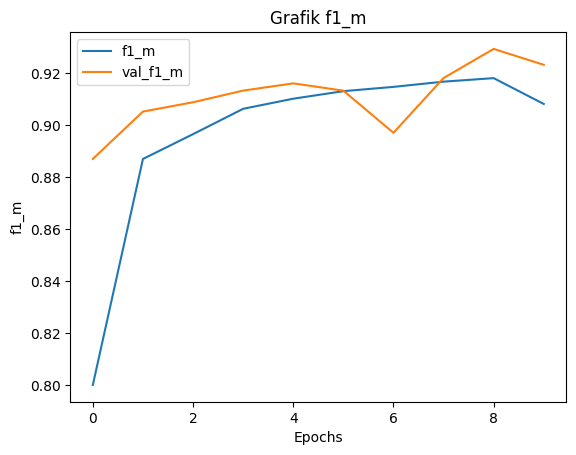

In [77]:
#Menampilkan grafik akurasi
import matplotlib.pyplot as plt

def plot_graphs(history, metric):
  plt.plot(history.history[metric])
  plt.plot(history.history['val_'+metric], '')
  plt.xlabel("Epochs")
  plt.ylabel(metric)
  plt.title(f'Grafik {metric}')
  plt.legend([metric, 'val_'+metric])
  
plot_graphs(history,'f1_m')

In [52]:
from sklearn.metrics import f1_score

### Light GBM

In [23]:
!pip install lightgbm

                                              0.0/1.0 MB ? eta -:--:--
     ---                                      0.1/1.0 MB 2.3 MB/s eta 0:00:01
     -----                                    0.1/1.0 MB 2.1 MB/s eta 0:00:01
     -----                                    0.1/1.0 MB 2.1 MB/s eta 0:00:01
     -----                                    0.1/1.0 MB 2.1 MB/s eta 0:00:01
     -----                                    0.1/1.0 MB 2.1 MB/s eta 0:00:01
     ---------------                          0.4/1.0 MB 1.3 MB/s eta 0:00:01
     ---------------------                    0.6/1.0 MB 1.8 MB/s eta 0:00:01
     ---------------------------------        0.8/1.0 MB 2.2 MB/s eta 0:00:01
     ---------------------------------------- 1.0/1.0 MB 2.4 MB/s eta 0:00:00


### SVM Algorithm

In [10]:
from sklearn import svm
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
clf = svm.SVC(verbose=True)
clf.fit(x_train, y_train)
# melakukan prediksi menggunakan data testing
y_pred = clf.predict(x_test)

# menghitung akurasi
acc = accuracy_score(y_test, y_pred)
f1=f1_score(y_test, y_pred)
print('Accuracy:', acc, 'F1 Score ',f1)

[LibSVM]

### Gradient Boosting Algorithm

In [53]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
# Define Gradient Boosting model
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)

# Train model
gb_model.fit(x_train, y_train)

# Make predictions on test set
y_pred = gb_model.predict(x_test)

# Calculate accuracy score
acc = accuracy_score(y_test, y_pred)
f1=f1_score(y_test, y_pred)
print('Accuracy:', acc, 'F1 Score ',f1)

Accuracy: 0.8344565049642472 F1 Score  0.835849826566007


### Gradient Boosting Grid Search

In [11]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

# Load your data and split it into features and labels
X = x_train# Your feature matrix
y = y_train  # Your target labels

# Define the parameter grid for grid search
param_grid = {
    'max_depth': [3, 6, 9],
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [100, 200, 300],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

# Create an XGBoost classifier
xgb_model = xgb.XGBClassifier()

# Perform grid search using cross-validation
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5)

# Fit the grid search to your data
grid_search.fit(X, y)

# Print the best parameters and best score
print("Best Parameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)


Best Parameters:  {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 300, 'subsample': 0.9}
Best Score:  0.949511603250625


### XGBoost

In [54]:
import xgboost as xgb
# define xgboost model
model = xgb.XGBClassifier(learning_rate=0.1,max_depth=6,n_estimators=300,subsample=0.9,colsample_bytree=0.8)

# fit the model on the training set
model.fit(x_train, y_train)

# make predictions on the test set
y_pred = model.predict(x_test)

acc = accuracy_score(y_test, y_pred)
f1=f1_score(y_test, y_pred)
print('Accuracy:', acc, 'F1 Score ',f1)
model.save_model("xgboost_model_6.json")

Accuracy: 0.8794176655177736 F1 Score  0.8797208538587848


In [55]:
import xgboost as xgb
# define xgboost model
model = xgb.XGBClassifier(learning_rate=0.1,max_depth=7,n_estimators=300,subsample=0.7,colsample_bytree=0.5)

# fit the model on the training set
model.fit(x_train, y_train)

# make predictions on the test set
y_pred = model.predict(x_test)

acc = accuracy_score(y_test, y_pred)
f1=f1_score(y_test, y_pred)
print('Accuracy:', acc, 'F1 Score ',f1)
model.save_model("xgboost_model_6.json")

Accuracy: 0.8792118936159268 F1 Score  0.8792926177256838


### XGBoost Grid Search

In [56]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score,f1_score


# define xgboost model
model = xgb.XGBClassifier()

# define hyperparameter grid for grid search
param_grid = {
    'learning_rate': [0.01, 0.1, 0.3],
    'max_depth': [3, 5, 7],
    'subsample': [0.5, 0.7],
    'colsample_bytree': [0.5, 0.7],
    'n_estimators': [100, 200, 300],
}

# perform grid search to find the best hyperparameters
grid_search = GridSearchCV(model, param_grid, scoring='accuracy', n_jobs=-1, cv=5)
grid_result = grid_search.fit(x_train, y_train)

# print the best hyperparameters
print("Best parameters: ", grid_result.best_params_)

# create a new model with the best hyperparameters
model = xgb.XGBClassifier(**grid_result.best_params_)

# fit the model on the training set
model.fit(x_train, y_train, early_stopping_rounds=10, eval_metric='logloss', eval_set=[(x_test, y_test)], verbose=False)

# make predi your target price
# ctions on the test set
y_pred = model.predict(x_test)

# calculate accuracy of predictions
acc = accuracy_score(y_test, y_pred)
f1=f1_score(y_test, y_pred)
print('Accuracy:', acc, 'F1 Score ',f1)

Best parameters:  {'colsample_bytree': 0.7, 'learning_rate': 0.3, 'max_depth': 7, 'n_estimators': 300, 'subsample': 0.7}


c:\Users\ASUS\AppData\Local\Programs\Python\Python38\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\ASUS\AppData\Local\Programs\Python\Python38\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


Accuracy: 0.882607129996399 F1 Score  0.8826976457283849


### XGBoost 10CV GridSearch

In [17]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score,f1_score


# define xgboost model
model = xgb.XGBClassifier()

# define hyperparameter grid for grid search
param_grid = {
    'learning_rate': [0.01, 0.1, 0.3],
    'max_depth': [3, 5, 7],
    'subsample': [0.5, 0.7],
    'colsample_bytree': [0.5, 0.7],
    'n_estimators': [100, 200, 300],
}

# perform grid search to find the best hyperparameters
grid_search = GridSearchCV(model, param_grid, scoring='accuracy', n_jobs=-1, cv=10)
grid_result = grid_search.fit(x_train, y_train)

# print the best hyperparameters
print("Best parameters: ", grid_result.best_params_)

# create a new model with the best hyperparameters
model = xgb.XGBClassifier(**grid_result.best_params_)

# fit the model on the training set
model.fit(x_train, y_train, early_stopping_rounds=10, eval_metric='logloss', eval_set=[(x_test, y_test)], verbose=False)

# make predi your target price
# ctions on the test set
y_pred = model.predict(x_test)

# calculate accuracy of predictions
acc = accuracy_score(y_test, y_pred)
f1=f1_score(y_test, y_pred)
print('Accuracy:', acc, 'F1 Score ',f1)

Best parameters:  {'colsample_bytree': 0.5, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 300, 'subsample': 0.7}


c:\Users\ASUS\AppData\Local\Programs\Python\Python38\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
c:\Users\ASUS\AppData\Local\Programs\Python\Python38\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


Accuracy: 0.9478368228818355 F1 Score  0.9460810379666064


In [ ]:
model.save_model("xgboost_model_7.json")

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score



# define the AdaBoost model
model = AdaBoostClassifier(n_estimators=50, random_state=42)

# fit the model on the training set
model.fit(x_train, y_train)

# make predictions on the test set
y_pred = model.predict(x_test)

# calculate accuracy of predictions
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
